# Python for Data Science and Analytics
### Day Two (Part 4): Solution Code
* **Instructor:** John Sandall
* **Company:** EY
* **Date:** Friday 15th February 2019
* **Contact:** john@coefficient.ai / @john_sandall

---

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# Lab: Working with databases
Databases provide many analytical capabilities, but often it's useful to pull the data back into Python for more flexible programming. Large, fixed operations would be more efficient in a database, but pandas allows for interactive processing.

For example, if you want to aggregate nightly log-ins or sales to present a report or dashboard, this operation is likely not changing and operating on a large dataset. This can run very efficiently in a database rather than by connecting to it with Python.

However, if we want to investigate login or sales data further and ask more interactive questions, then Python would be more practical.

In [4]:
# Let's look at some page views data from the New York Times
nyt = pd.read_csv('nyt.csv')
nyt.head()

Age  Gender  Impressions  Clicks  Signed_In
0   36       0            3       0          1
1   73       1            3       0          1
2   30       0            3       0          1
3   49       1            3       0          1
4   47       1           11       0          1

In [5]:
# How many records?
len(nyt)

458441

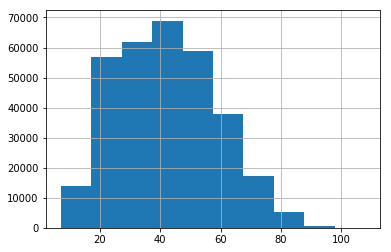

In [6]:
# Histogram
nyt[nyt.Signed_In == 1].Age.hist()

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


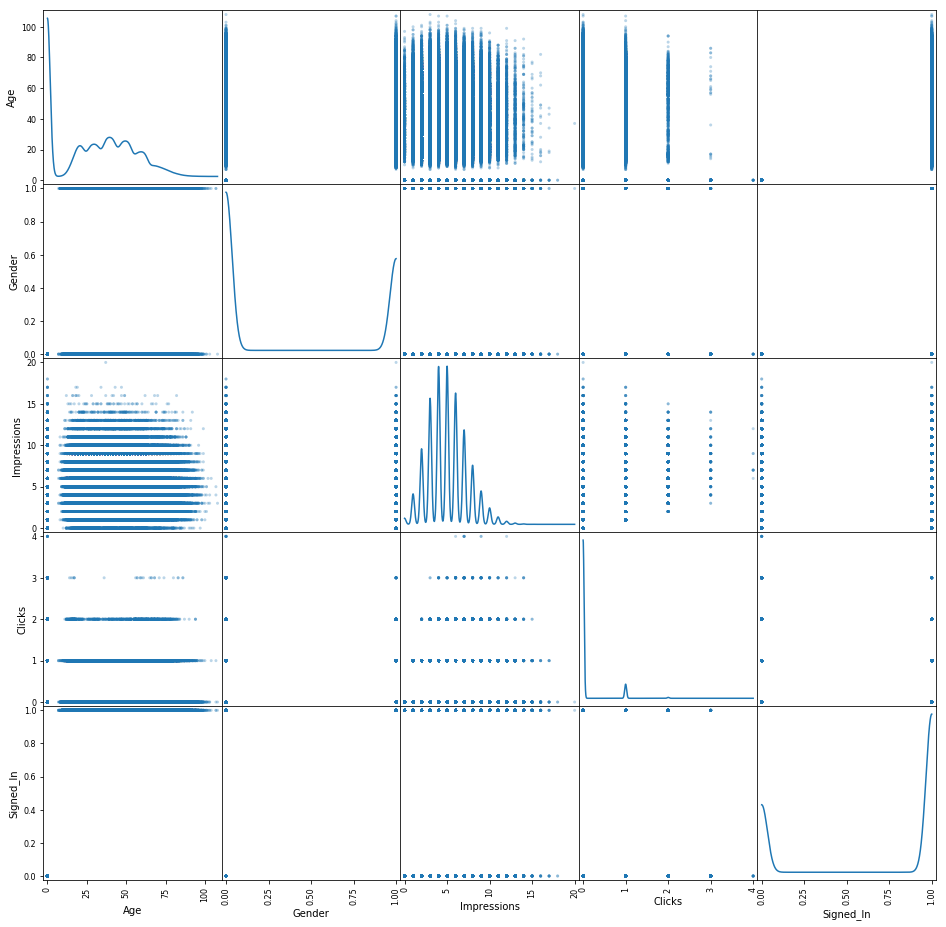

In [5]:
# Neat trick!
x = pd.scatter_matrix(nyt, diagonal='kde', alpha=0.3, figsize=(16, 16))

In [7]:
# First let's explore how we could connect to a SQLite (i.e. local file-based) database:
from pandas.io import sql
import sqlite3

conn = sqlite3.connect('test_sqlite_database.db')

This creates a file `test_sqlite_database.db` in the current directory which will act as a lightweight relational SQL database. Pandas uses column information to infer the schema for the table it creates.

`to_sql` takes as arguments:
  - `name`, the table name to create
  - `con`, a connection to a database
  - `index`, whether to input the index column
  - `schema`, if we want to write a custom schema for the new table
  - `if_exists`, what to do if the table already exists. We can overwrite it, add to it, or fail

In [8]:
nyt.to_sql('nyt', con=conn, if_exists='replace', index=False)

In [9]:
sql.read_sql("SELECT * FROM nyt LIMIT 10", con=conn)

Age  Gender  Impressions  Clicks  Signed_In
0   36       0            3       0          1
1   73       1            3       0          1
2   30       0            3       0          1
3   49       1            3       0          1
4   47       1           11       0          1
5   47       0           11       1          1
6    0       0            7       1          0
7   46       0            5       0          1
8   16       0            3       0          1
9   52       0            4       0          1

In [10]:
sql.read_sql("""
    SELECT Gender, SUM(Impressions)
    FROM nyt
    GROUP BY Gender""", con=conn)

Gender  SUM(Impressions)
0       0           1452782
1       1            842777

> #### EXERCISE: Load the sales funnel data in `EU-referendum-result-data.csv` and create a table in the database called `referendum` from it:

In [11]:
referendum = pd.read_csv('https://s3-eu-west-1.amazonaws.com/sixfifty/EU-referendum-result-data.csv')
referendum.head()

id Region_Code Region  Area_Code             Area  Electorate  \
0  108   E12000006   East  E06000031     Peterborough      120892   
1  109   E12000006   East  E06000032            Luton      127612   
2  112   E12000006   East  E06000033  Southend-on-Sea      128856   
3  113   E12000006   East  E06000034         Thurrock      109897   
4  110   E12000006   East  E06000055          Bedford      119530   

   ExpectedBallots  VerifiedBallotPapers  Pct_Turnout  Votes_Cast  \
0            87474                 87469        72.35       87469   
1            84633                 84636        66.31       84616   
2            93948                 93939        72.90       93939   
3            79969                 79954        72.75       79950   
4            86136                 86136        72.06       86135   

       ...       Remain  Leave  Rejected_Ballots  No_official_mark  \
0      ...        34176  53216                77                 0   
1      ...        36708  47773               135                 0   
2      ...        39348  54522                69                 0   
3      ...        22151  57765                34                 0   
4      ...        41497  44569                69                 0   

   Voting_for_both_answers  Writing_or_mark  Unmarked_or_void  Pct_Remain  \
0                       32                7                38       39.11   
1                       85                0                50       43.45   
2                       21                0                48       41.92   
3                        8                3                23       27.72   
4                       26                1                42       48.22   

   Pct_Leave  Pct_Rejected  
0      60.89          0.09  
1      56.55          0.16  
2      58.08          0.07  
3      72.28          0.04  
4      51.78          0.08  

[5 rows x 21 columns]

In [12]:
referendum.to_sql('referendum', con=conn, if_exists='replace', index=False)

> #### EXERCISE: Using a SQL query on the `referendum` SQLite table, which region had the highest turnout?

In [13]:
sql.read_sql("""
    SELECT Region, SUM(Votes_Cast) * 100.0 / SUM(Electorate) AS Turnout
    FROM referendum
    GROUP BY Region
    ORDER BY Turnout DESC""", con=conn)

Region    Turnout
0                 South East  76.764112
1                 South West  76.723204
2                       East  75.732359
3              East Midlands  74.180680
4              West Midlands  72.034912
5                      Wales  71.711848
6   Yorkshire and The Humber  70.689209
7                 North West  69.991022
8                     London  69.702594
9                 North East  69.345943
10                  Scotland  67.246142
11          Northern Ireland  62.692404

### Example: Connecting to a MySQL database

In [ ]:
from sqlalchemy import create_engine

In [ ]:
# Create MySQL connection string
db_connect_url = 'mysql://{user}:{password}@{host}:{port}/{database}'.format(
    user=INSERT_USERNAME_HERE,
    password=INSERT_PASSWORD_HERE,
    host=DATABASE_HOST,
    port=DATABASE_PORT,
    database=DATABASE_NAME
    )

# Use SQLAlchemy to create the connection
conn = create_engine(db_connect_url)

# Execute a SQL query (e.g. DELETE command)
sql_query = "DELETE FROM {table} WHERE {condition};".format(
    table=TABLE_NAME,
    condition=SOME_SQL_CONDITION
)
pd.io.sql.execute(sql_query, conn)

# Upload (append) a dataframe to an existing db table
some_dataframe.to_sql(
    name=table_name,
    con=conn,
    flavor='mysql',
    if_exists='append',
    index=False,
    chunksize=1000
)

### Aside: left joins in pandas without using SQL (and filtering on missing values)

In [14]:
# Create df_left
df_left = pd.DataFrame({'name': ['cat', 'dog', 'fish'], 'left': [1, 2, 3]})
df_left

name  left
0   cat     1
1   dog     2
2  fish     3

In [15]:
# Create df_right
df_right = pd.DataFrame({'name': ['cat', 'dog', 'fish', 'orangutan'],
                         'right': [10, 20, 30, 40]})
df_right

name  right
0        cat     10
1        dog     20
2       fish     30
3  orangutan     40

In [16]:
# Merge using an inner join
df = pd.merge(left=df_left, right=df_right, on='name', how='inner')
df

name  left  right
0   cat     1     10
1   dog     2     20
2  fish     3     30

In [17]:
# Merge using an inner join
df = pd.merge(left=df_left, right=df_right, on='name', how='inner')
df

name  left  right
0   cat     1     10
1   dog     2     20
2  fish     3     30

In [18]:
# Filter to non-missing values in the 'left' column
df[df['left'].notnull()]

name  left  right
0   cat     1     10
1   dog     2     20
2  fish     3     30

# Lab: Python + Excel

### Reading from Excel workbooks
From the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/io.html#excel-files):
> The `read_excel()` method can read Excel 2003 (.xls) and Excel 2007+ (.xlsx) files using the xlrd Python module. The `to_excel()` instance method is used for saving a DataFrame to Excel. Generally the semantics are similar to working with csv data.

Commonly used arguments for `pd.read_excel()` function:

```
df = pd.read_excel(
    'excel_file_name.xlsx',
    sheet_name=0,            # either sheet position (0 is first sheet) or name (as string)
    header=0,                # row to use for column names
    skiprows=None,           # skip any rows at beginning?
    skip_footer=0,           # skip any rows at end?
    names=None,              # list of column names (optional)
    thousands=None,          # thousands separator for parsing string columns (e.g. "1,200") to numeric (e.g. 1200)
)
```

In [19]:
# Let's read the table from ftse.xlsx
ftse = pd.read_excel(
    'ftse.xlsx',
    sheet_name='Sheet1',
    header=0,
    skiprows=2
)

ftse.head()

Unnamed: 0       Date         Open    High          Low        Close  \
0         NaN 2007-01-02  6220.799805  6312.5  6220.799805  6310.899902   
1         NaN 2007-01-03  6310.899902  6322.0  6296.000000  6319.000000   
2         NaN 2007-01-04  6319.000000  6319.0  6261.000000  6287.000000   
3         NaN 2007-01-05  6287.000000  6287.0  6220.100098  6220.100098   
4         NaN 2007-01-08  6220.100098  6246.0  6187.000000  6194.200195   

       Volume    Adj Close  
0  1074946500  6310.899902  
1  1606892700  6319.000000  
2  1902875600  6287.000000  
3  1622439300  6220.100098  
4  1326700900  6194.200195

In [20]:
# We need to drop the first column
ftse = ftse.drop('Unnamed: 0', axis=1)
ftse.head()

Date         Open    High          Low        Close      Volume  \
0 2007-01-02  6220.799805  6312.5  6220.799805  6310.899902  1074946500   
1 2007-01-03  6310.899902  6322.0  6296.000000  6319.000000  1606892700   
2 2007-01-04  6319.000000  6319.0  6261.000000  6287.000000  1902875600   
3 2007-01-05  6287.000000  6287.0  6220.100098  6220.100098  1622439300   
4 2007-01-08  6220.100098  6246.0  6187.000000  6194.200195  1326700900   

     Adj Close  
0  6310.899902  
1  6319.000000  
2  6287.000000  
3  6220.100098  
4  6194.200195

In [21]:
# Check we've read in the dates correctly.
ftse.Date[0]

Timestamp('2007-01-02 00:00:00')

In [22]:
# Timestamp objects have special attributes, e.g. year/month/day
ftse.Date[0].year

2007

### Writing to Excel workbooks

**Goal:** Create a pivot table containing months down the left-hand side, years along the top, and values containing the total Volume traded in that month and year, and output the result into a new Excel workbook.

> **Exercise:** Using the 'Date' column and `.apply()`, create a new column called `'month'` extracting the numeric month from the date.

In [23]:
ftse['month'] = ftse['Date'].apply(lambda x: x.month)
ftse.head()

Date         Open    High          Low        Close      Volume  \
0 2007-01-02  6220.799805  6312.5  6220.799805  6310.899902  1074946500   
1 2007-01-03  6310.899902  6322.0  6296.000000  6319.000000  1606892700   
2 2007-01-04  6319.000000  6319.0  6261.000000  6287.000000  1902875600   
3 2007-01-05  6287.000000  6287.0  6220.100098  6220.100098  1622439300   
4 2007-01-08  6220.100098  6246.0  6187.000000  6194.200195  1326700900   

     Adj Close  month  
0  6310.899902      1  
1  6319.000000      1  
2  6287.000000      1  
3  6220.100098      1  
4  6194.200195      1

> **Exercise:** Using the 'Date' column and `.apply()`, create a new column called `'year'` extracting the numeric year from the date.

In [24]:
ftse['year'] = ftse['Date'].apply(lambda x: x.year)
ftse.head()

Date         Open    High          Low        Close      Volume  \
0 2007-01-02  6220.799805  6312.5  6220.799805  6310.899902  1074946500   
1 2007-01-03  6310.899902  6322.0  6296.000000  6319.000000  1606892700   
2 2007-01-04  6319.000000  6319.0  6261.000000  6287.000000  1902875600   
3 2007-01-05  6287.000000  6287.0  6220.100098  6220.100098  1622439300   
4 2007-01-08  6220.100098  6246.0  6187.000000  6194.200195  1326700900   

     Adj Close  month  year  
0  6310.899902      1  2007  
1  6319.000000      1  2007  
2  6287.000000      1  2007  
3  6220.100098      1  2007  
4  6194.200195      1  2007

We'd like to use month names instead of numbers, so first we need to learn how to go from "2" to "February":

In [25]:
from datetime import datetime

month_number = 2
datetime.strptime(str(month_number), '%m').strftime('%B')

'February'

Useful Python datetime formatting reference: http://strftime.org/

> **Exercise:** Using the above code, write a function that can take a month (as numeric integer) and returns the month name.

In [26]:
def month_name_from_number(x):
    return datetime.strptime(str(x), '%m').strftime('%B')

In [27]:
# TEST: this should return "September"
month_name_from_number(9)

'September'

> **Exercise:** Using your new `month` column, and your `month_name_from_number()` function, create a new column called `month_name` that contains the name of the month extracted from the date.

In [28]:
ftse['month_name'] = ftse['month'].apply(month_name_from_number)
ftse.head()

Date         Open    High          Low        Close      Volume  \
0 2007-01-02  6220.799805  6312.5  6220.799805  6310.899902  1074946500   
1 2007-01-03  6310.899902  6322.0  6296.000000  6319.000000  1606892700   
2 2007-01-04  6319.000000  6319.0  6261.000000  6287.000000  1902875600   
3 2007-01-05  6287.000000  6287.0  6220.100098  6220.100098  1622439300   
4 2007-01-08  6220.100098  6246.0  6187.000000  6194.200195  1326700900   

     Adj Close  month  year month_name  
0  6310.899902      1  2007    January  
1  6319.000000      1  2007    January  
2  6287.000000      1  2007    January  
3  6220.100098      1  2007    January  
4  6194.200195      1  2007    January

### Pivot Tables in pandas

In [29]:
# We can now create a pivot total of total volume by month and year
volume_by_month_and_year = pd.pivot_table(ftse,
                                          index='month_name',
                                          columns='year',
                                          values='Volume',
                                          aggfunc=np.sum)
volume_by_month_and_year

year               2007         2008         2009         2010         2011  \
month_name                                                                    
April       31552436000  25274143900  25137931400  21096454300  12949138100   
August      38476548600  23496934500  20616527400  18212358900  25910288300   
December    19604099800  20068050300  20435954700  13805135600  14853676300   
February    33113527000  28408840500  24620222800  25453436400  16977620800   
January     36903883500  34401653600  27430125500  22411336500  17841124600   
July        38493757700  38130751100  22705926400  20927401500  17010630200   
June        39617755400  30958200000  25379501400  24401952000  19032766200   
March       40662590700  30218452400  32520602500  25031230500  19735351900   
May         40045492800  23305545700  22926029100  30624328300  17884230800   
November    32517377700  26771142100  21821867000  19371404300  21152667800   
October     41475583000  39422701700  24449723700  16935426300  17954993900   
September   35732252800  34049796600  22518435400  17869511900  20702669900   

year               2012         2013         2014         2015         2016  
month_name                                                                   
April       17509200800  14318860800  15498792200  14644991100  15835859600  
August      13447450000  13676112800  10850819300  17165806900  15725368400  
December    10068193300  10796315200  13989469200  13433251400  13359461400  
February    19080523000  14127015100  17298837700  14358563900  19208966500  
January     19750352900  14215886300  15183203400  15644596100  17403133600  
July        14704975600  14667037000  13168689700  15435132500  17239094600  
June        18244742000  15906792500  12758465400  16012377600  24856693500  
March       21190270200  15791228900  18328722100  17391381400  16590666300  
May         19821912700  15759714300  13894805500  15318287400  15082622900  
November    16159586000  12583322200  14266358300  13446951500   8823430500  
October     16344114000  14042142400  20158414000  10726090600  18708869600  
September   16517517300  15309122900  15417322100  17388811000  17576340000

In [30]:
# The months are out of order! Add numeric month to the index to fix this.
volume_by_month_and_year = pd.pivot_table(ftse,
                                          index=['month', 'month_name'],  # <- CHANGED!
                                          columns='year',
                                          values='Volume',
                                          aggfunc=np.sum)
volume_by_month_and_year

year                     2007         2008         2009         2010  \
month month_name                                                       
1     January     36903883500  34401653600  27430125500  22411336500   
2     February    33113527000  28408840500  24620222800  25453436400   
3     March       40662590700  30218452400  32520602500  25031230500   
4     April       31552436000  25274143900  25137931400  21096454300   
5     May         40045492800  23305545700  22926029100  30624328300   
6     June        39617755400  30958200000  25379501400  24401952000   
7     July        38493757700  38130751100  22705926400  20927401500   
8     August      38476548600  23496934500  20616527400  18212358900   
9     September   35732252800  34049796600  22518435400  17869511900   
10    October     41475583000  39422701700  24449723700  16935426300   
11    November    32517377700  26771142100  21821867000  19371404300   
12    December    19604099800  20068050300  20435954700  13805135600   

year                     2011         2012         2013         2014  \
month month_name                                                       
1     January     17841124600  19750352900  14215886300  15183203400   
2     February    16977620800  19080523000  14127015100  17298837700   
3     March       19735351900  21190270200  15791228900  18328722100   
4     April       12949138100  17509200800  14318860800  15498792200   
5     May         17884230800  19821912700  15759714300  13894805500   
6     June        19032766200  18244742000  15906792500  12758465400   
7     July        17010630200  14704975600  14667037000  13168689700   
8     August      25910288300  13447450000  13676112800  10850819300   
9     September   20702669900  16517517300  15309122900  15417322100   
10    October     17954993900  16344114000  14042142400  20158414000   
11    November    21152667800  16159586000  12583322200  14266358300   
12    December    14853676300  10068193300  10796315200  13989469200   

year                     2015         2016  
month month_name                            
1     January     15644596100  17403133600  
2     February    14358563900  19208966500  
3     March       17391381400  16590666300  
4     April       14644991100  15835859600  
5     May         15318287400  15082622900  
6     June        16012377600  24856693500  
7     July        15435132500  17239094600  
8     August      17165806900  15725368400  
9     September   17388811000  17576340000  
10    October     10726090600  18708869600  
11    November    13446951500   8823430500  
12    December    13433251400  13359461400

In [31]:
# Export as Excel file
volume_by_month_and_year.to_excel('volume_by_month_and_year.xlsx', sheet_name='FTSE Volume by Month and Year')

### Create and format Excel documents from scratch
We'll be trying out a new library called `xlsxwriter` for this section.

In [32]:
import xlsxwriter as xl

In [33]:
# Let's look at average monthly volumes
volume_by_month = ftse.groupby(['month', 'month_name']).Volume.sum()
volume_by_month

month  month_name
1      January       221185296000
2      February      212647553700
3      March         237460496900
4      April         193817808200
5      May           214662969500
6      June          227169246000
7      July          212483396300
8      August        197578215100
9      September     213081779900
10     October       220218059200
11     November      186914107400
12     December      150413607200
Name: Volume, dtype: int64

In [34]:
# Reset the index to turn this into a proper dataframe
volume_by_month = volume_by_month.reset_index()
volume_by_month

month month_name        Volume
0       1    January  221185296000
1       2   February  212647553700
2       3      March  237460496900
3       4      April  193817808200
4       5        May  214662969500
5       6       June  227169246000
6       7       July  212483396300
7       8     August  197578215100
8       9  September  213081779900
9      10    October  220218059200
10     11   November  186914107400
11     12   December  150413607200

In [35]:
# Drop the numeric month column
volume_by_month = volume_by_month.drop('month', axis=1)
volume_by_month

month_name        Volume
0     January  221185296000
1    February  212647553700
2       March  237460496900
3       April  193817808200
4         May  214662969500
5        June  227169246000
6        July  212483396300
7      August  197578215100
8   September  213081779900
9     October  220218059200
10   November  186914107400
11   December  150413607200

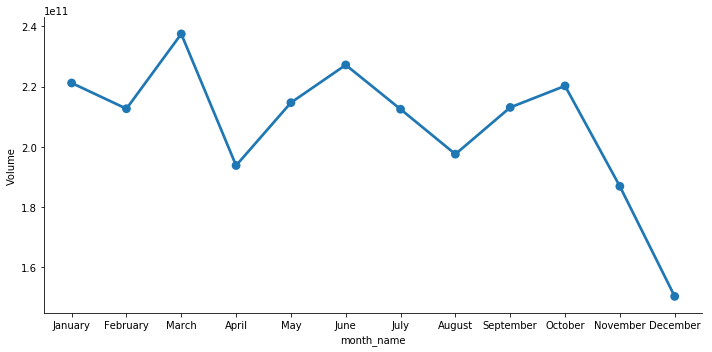

In [36]:
# How does this look?
sns.catplot(x='month_name', y='Volume', kind='point', data=volume_by_month, height=5, aspect=2)

This looks good! Now let's try to put the data table into an Excel workbook, format the workbook to our liking, and add a chart into the Excel workbook too!

In [37]:
# Let's put this data and chart into a formatted workbook using xlsxwriter

# Create the workbook
workbook = xl.Workbook('volume_by_month.xlsx')

# Add a sheet
data_worksheet = workbook.add_worksheet('Data')

# Add some text into cells A1 and B1
data_worksheet.write('A1', 'Month')
data_worksheet.write('B1', 'Volume')

# We'll add the data by iterating through the cols and rows of the dataframe
# and adding the data into the workbook using positional locations.
n_rows, n_cols = volume_by_month.shape

for col in range(n_cols):
    for row in range(n_rows):
        data_worksheet.write(
            row + 1,  # add a row for column headers
            col,
            volume_by_month.iloc[row, col]
        )

**Note:** Above we're iterating through the dataframe and writing the values cell by cell into the spreadsheet. In practice, it can be a lot easier! For more details see https://xlsxwriter.readthedocs.io/working_with_pandas.html

In [38]:
# What row are we at?
row + 1

12

In [39]:
# Let's add an Excel formula giving the total volume below the table
data_worksheet.write(row + 3, 0, "Total:")
data_worksheet.write(row + 3, 1, f"=SUM(B2:B{row + 1})")

0

In [40]:
# Once we're done, we close the workbook.
workbook.close()

Stop now, and open the workbook in Excel to see how this looks.

It could do with a bit of formatting...

In [41]:
# Let's do it again but adding some formatting this time

workbook = xl.Workbook('volume_by_month.xlsx')
data_worksheet = workbook.add_worksheet('Data')

# NEW! Add a bold format to use to highlight cells.
bold = workbook.add_format({'bold': True})

# NEW! Add a number format.
volume_format = workbook.add_format({'num_format': '#,##0'})

# NEW! Adjust the column width
data_worksheet.set_column(1, 1, 20)
data_worksheet.set_column(2, 1, 30)

# As before, but we've added `bold` as a format option
data_worksheet.write('A1', 'Month', bold)
data_worksheet.write('B1', 'Volume', bold)
n_rows, n_cols = volume_by_month.shape

for col in range(n_cols):
    for row in range(n_rows):
        data_worksheet.write(
            row + 1,  # add a row for column headers
            col,
            volume_by_month.iloc[row, col],
            volume_format
        )

data_worksheet.write(row + 3, 0, "Total:")
data_worksheet.write(row + 3, 1, f"=SUM(B2:B{row + 2})", volume_format)

workbook.close()

Have another look at the workbook. It's looking better, but could still do with a nice graph...

In [42]:
# Finally, let's do it one more time but add a chart in a separate sheet

workbook = xl.Workbook('volume_by_month.xlsx')
data_worksheet = workbook.add_worksheet('Data')
chart_worksheet = workbook.add_worksheet('Chart')  # NEW!

# Add a bold format to use to highlight cells.
bold = workbook.add_format({'bold': True})

# Add a number format.
volume_format = workbook.add_format({'num_format': '#,##0'})

# Adjust the column width
data_worksheet.set_column(1, 1, 20)
data_worksheet.set_column(2, 1, 30)


data_worksheet.write('A1', 'Month', bold)
data_worksheet.write('B1', 'Volume', bold)
n_rows, n_cols = volume_by_month.shape

for col in range(n_cols):
    for row in range(n_rows):
        data_worksheet.write(
            row + 1,  # add a row for column headers
            col,
            volume_by_month.iloc[row, col],
            volume_format
        )

data_worksheet.write(row + 3, 0, "Total:")
data_worksheet.write(row + 3, 1, f"=SUM(B2:B{row + 2})", volume_format)

## EVERYTHING BELOW HERE IS ALSO NEW!

# Create chart object
chart = workbook.add_chart({'type': 'line'})

# Add data to the chart
chart.add_series({
    'categories': '=Data!$A$2:$A$13',
    'values': '=Data!$B$2:$B$13'
})

# Set min/max on the y-axis
chart.set_y_axis({
    'name': 'Volume',
    'min': volume_by_month.Volume.min() * .9,
    'max': volume_by_month.Volume.max() * 1.1,
})

# Give it a title
chart.set_title({'name': 'FTSE Total Volume by Month'})

# Insert the chart into the worksheet.
chart_worksheet.insert_chart('C1', chart)

workbook.close()

See https://xlsxwriter.readthedocs.io/ for more on what's possible using xlsxwriter.

For deeper integration between Python and Excel, you may be interested in looking at XLWings (https://www.xlwings.org/).

---